<a href="https://colab.research.google.com/github/MrVeGGi3/AI-for-Games/blob/main/Matheus_Veras_FuzzyApplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Conceito:** Dobe (NPC) cuida do castelo de seu amo e senhor, o "Bruxo". Ao longo do jogo, Dobe precisa limpar a sujeira deixada pelo Bruxo em toda parte do castelo ...

Para isso, transforma-se em um aspirador de pó que configurar sua potência de sucção  conforme a dificuldade da superfície e a quantidade de sujeira deixada pelo Bruxo

**Antecedentes (entradas)**

Dificuldade_Superfície ('superficie'): nível de dificuldade da superfície, com suporte em uma escala de 0 a 10

Termos: fácil, moderada, difícil



Quantidade_Sujeira ('sujeira'): quantidade de sujeira, com suporte em uma escala de 0 a 10

Termos: leve, moderada, intolerável



**Consequente (saída)**

Potencia_Sucção ('succao'): potência de sucção que o aspirador de pó configura, com suporte variando entre 0% e 100%? -Termos: baixa, média, alta



**Pede-se:**

Utilizando a biblioteca SciKit-Fuzzy do Python implemente um notebook com as funções de pertinência para os termos antecedentes e consequentes e um conjunto de no mínimo 10 regras fuzzy para estabelecer o comportamento de Dobe. Teste o modelo para 3 configurações distintas de entradas.

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=0385db73cbf7ae6642c6791b4b9f7422c75cc5259a30cdf1da8a3b9ab599c879
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Antecedentes

In [11]:
dificuldade_superficie = ctrl.Antecedent(np.arange(0,11,1), 'superficie')

In [12]:
dificuldade_superficie.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
quantidade_sujeira = ctrl.Antecedent(np.arange(0,11,1), 'sujeira')

In [7]:
quantidade_sujeira.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Consequente(Saída)

In [9]:
potencia_succao = ctrl.Consequent(np.arange(0,101,1), 'succao')

In [10]:
potencia_succao.universe

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

Ajuste de Gráfico

In [13]:
dificuldade_superficie.automf(number = 3, names = ['fácil', 'moderado', 'difícil'])

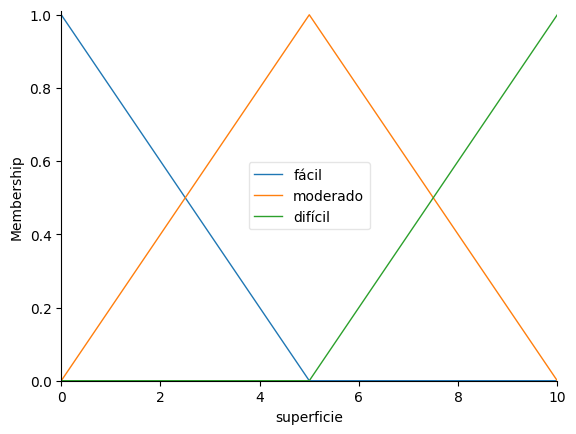

In [14]:
dificuldade_superficie.view()

In [16]:
quantidade_sujeira.automf(number = 3, names = ['leve', 'moderada', 'intolerável'])

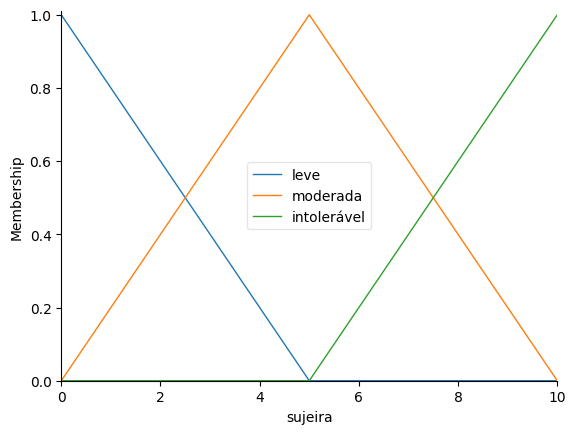

In [17]:
quantidade_sujeira.view()

In [25]:
potencia_succao['baixa'] = fuzz.trimf(potencia_succao.universe, [0, 0, 50])
potencia_succao['média'] = fuzz.trimf(potencia_succao.universe, [0, 50, 100])
potencia_succao['alta'] = fuzz.trimf(potencia_succao.universe, [50, 100, 100])

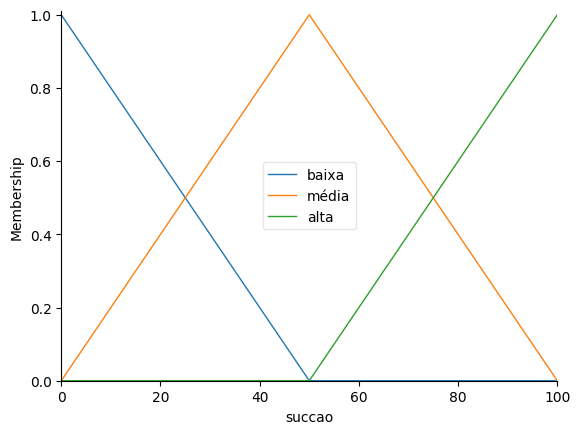

In [26]:
potencia_succao.view()

Regras Fuzzy

In [32]:
regra1 = ctrl.Rule(dificuldade_superficie['fácil'] & quantidade_sujeira['leve'], potencia_succao['baixa'])
regra2 = ctrl.Rule(dificuldade_superficie['fácil'] & quantidade_sujeira['moderada'], potencia_succao['baixa'])
regra3 = ctrl.Rule(dificuldade_superficie['fácil'] & quantidade_sujeira['intolerável'], potencia_succao['alta'])
regra4 = ctrl.Rule(dificuldade_superficie['moderado'] & quantidade_sujeira['leve'], potencia_succao['baixa'])
regra5 = ctrl.Rule(dificuldade_superficie['moderado'] & quantidade_sujeira['moderada'], potencia_succao['média'])
regra6 = ctrl.Rule(dificuldade_superficie['moderado'] & quantidade_sujeira['intolerável'], potencia_succao['alta'])
regra7 = ctrl.Rule(dificuldade_superficie['difícil'] & quantidade_sujeira['leve'], potencia_succao['média'])
regra8 = ctrl.Rule(dificuldade_superficie['difícil'] & quantidade_sujeira['moderada'], potencia_succao['alta'])
regra9 = ctrl.Rule(dificuldade_superficie['difícil'] & quantidade_sujeira['intolerável'], potencia_succao['alta'])
regra10 = ctrl.Rule(dificuldade_superficie['difícil'] | dificuldade_superficie['moderado'] & quantidade_sujeira['intolerável'], potencia_succao['alta'])

Sistema Fuzzy


In [33]:
motor = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10])
sistema = ctrl.ControlSystemSimulation(motor)

1° Input

Força da Sucção: 50.000000000000014


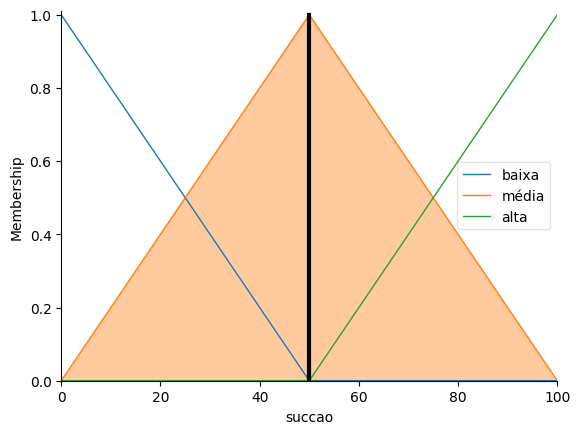

In [42]:
sistema.input['superficie'] = 5
sistema.input['sujeira'] = 5
sistema.compute()
print("Força da Sucção:", sistema.output['succao'])
potencia_succao.view(sim = sistema)

2° Input


Força da Sucção: 65.42857142857146


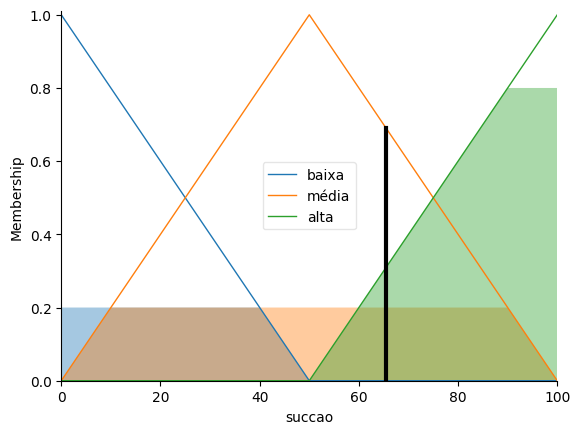

In [43]:
sistema.input['superficie'] = 1
sistema.input['sujeira'] = 9
sistema.compute()
print("Força da Sucção:", sistema.output['succao'])
potencia_succao.view(sim = sistema)

3° Input

Força da Sucção: 45.851851851851954


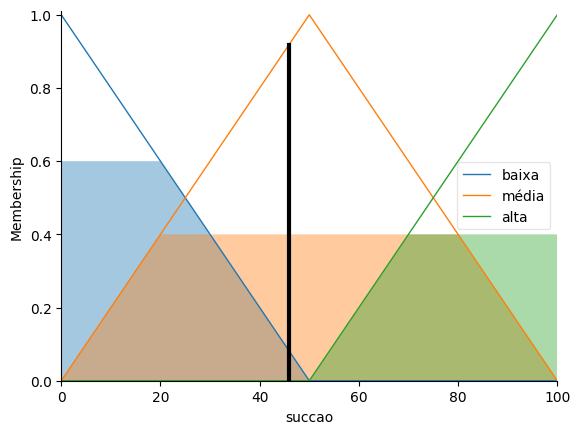

In [44]:
sistema.input['superficie'] = 7
sistema.input['sujeira'] = 2
sistema.compute()
print("Força da Sucção:", sistema.output['succao'])
potencia_succao.view(sim = sistema)

4° Input
